### Trabalhando com planilhas do excel.

In [ ]:
#Importando a biblioteca.
import pandas as pd

In [ ]:
#Leitura dos arquivos.
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx")

In [ ]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
#Exibindo as 5 primeiras linhas.
print(df.head())

    Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8


In [ ]:
#Exibindo as 5 últimas linhas.
print(df.tail())

       Cidade       Data  Vendas  LojaID  Qtde
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3


In [ ]:
#Coletar uma amostra do cunjunto de dados.
print(df.sample(5))

        Cidade       Data  Vendas  LojaID  Qtde
147   Salvador 2019-01-02   34.50    1035     1
52      Recife 2019-01-01   11.87     981     6
70       Natal 2019-02-14  743.00     854     4
140   Salvador 2019-03-02   20.79    1036     2
109  Fortaleza 2019-03-02   18.90     982     6


In [ ]:
#Verificando o tipo de dado de cada coluna.
print(df.dtypes)

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object


In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
print(df.dtypes)

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object


In [ ]:
print(df.head())

    Cidade       Data  Vendas LojaID  Qtde
0  Aracaju 2018-01-01  142.00   1520     1
1  Aracaju 2018-01-01   14.21   1522     6
2  Aracaju 2018-01-01   71.55   1520     1
3  Aracaju 2018-01-01    3.01   1521     7
4  Aracaju 2018-01-01   24.51   1522     8


### Tratando valores faltantes

In [ ]:
#Consultando linhas com valores faltantes
print(df.isnull().sum())

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64


In [ ]:
#Substituindo os valores nulos pela média.
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
print(df["Vendas"].mean())

122.61180089485458


In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos por zero.
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos.
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna.
df.dropna(subset=["Vendas"], inplace=True) 

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas.
df.dropna(how="all", inplace=True)

### Criando novas colunas

In [ ]:
#Criando a coluna de receitas.
df["Receita"] = df["Vendas"].mul(df['Qtde'])
print(df.head())

    Cidade       Data  Vendas LojaID  Qtde  Receita
0  Aracaju 2018-01-01  142.00   1520     1   142.00
1  Aracaju 2018-01-01   14.21   1522     6    85.26
2  Aracaju 2018-01-01   71.55   1520     1    71.55
3  Aracaju 2018-01-01    3.01   1521     7    21.07
4  Aracaju 2018-01-01   24.51   1522     8   196.08


In [ ]:
#Achando a Qtde de produtos vendidos.
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
print(df.head())

    Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas
0  Aracaju 2018-01-01  142.00   1520     1   142.00             1.0
1  Aracaju 2018-01-01   14.21   1522     6    85.26             6.0
2  Aracaju 2018-01-01   71.55   1520     1    71.55             1.0
3  Aracaju 2018-01-01    3.01   1521     7    21.07             7.0
4  Aracaju 2018-01-01   24.51   1522     8   196.08             8.0


In [ ]:
#Retornando a maior receita.
print(df["Receita"].max())

3544.0


In [ ]:
#Retornando a menor receita.
print(df["Receita"].min())

3.34


In [ ]:
#nlargest para mostrar as 3 lojas que mais venderam.
print(df.nlargest(3, "Receita"))

   Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas
7   Natal 2019-03-18   886.0    853     4   3544.0             4.0
51  Natal 2018-01-21   859.0    852     4   3436.0             4.0
55  Natal 2019-01-08   859.0    854     4   3436.0             4.0


In [ ]:
#nsmallest para mostrar as lojas que menos venderam.
print(df.nsmallest(3, "Receita"))

      Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas
118  Aracaju 2018-01-01    3.34   1522     1     3.34             1.0
65    Recife 2019-01-01    4.01    981     1     4.01             1.0
92     Natal 2019-01-02    4.57   1035     1     4.57             1.0


In [ ]:
#Agrupamento por cidade.
print(df.groupby("Cidade")["Receita"].sum())

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64


In [ ]:
#Ordenando o conjunto de dados.
print(df.sort_values("Receita", ascending=False).head(10))

   Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas
7   Natal 2019-03-18   886.0    853     4   3544.0             4.0
55  Natal 2019-01-08   859.0    854     4   3436.0             4.0
51  Natal 2018-01-21   859.0    852     4   3436.0             4.0
30  Natal 2018-10-02   856.0    853     4   3424.0             4.0
41  Natal 2018-05-20   835.0    852     4   3340.0             4.0
38  Natal 2018-02-25   828.0    852     4   3312.0             4.0
10  Natal 2018-10-27   828.0    852     4   3312.0             4.0
69  Natal 2019-03-24   817.0    852     4   3268.0             4.0
62  Natal 2018-02-10   793.0    854     4   3172.0             4.0
52  Natal 2018-04-27   778.0    854     4   3112.0             4.0


### Trabalhando com datas

In [ ]:
#Transformando a coluna de data em tipo inteiro.
df["Data"] = df["Data"].astype("int64")
print(df.dtypes)

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Transformando a coluna de data em data.
df["Data"] = pd.to_datetime(df["Data"])
print(df.dtypes)

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object


In [ ]:
#Agrupamento por ano.
print(df.groupby(df["Data"].dt.year)["Receita"].sum())

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64


In [ ]:
#Criando uma nova coluna com o ano.
df["Ano_Venda"] = df["Data"].dt.year
print(df.sample(5))

       Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
7    Salvador 2019-02-11    6.13   1034     2    12.26             2.0   
177  Salvador 2019-01-02   41.19   1037     2    82.38             2.0   
12   Salvador 2019-01-01  125.05   1034     3   375.15             3.0   
103     Natal 2019-01-02  191.60   1034     1   191.60             1.0   
222  Salvador 2019-01-02   43.96   1037     1    43.96             1.0   

     Ano_Venda  
7         2019  
177       2019  
12        2019  
103       2019  
222       2019  


In [ ]:
#Extraindo o mês e o dia.
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
print(df.sample(5))

        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
171      Natal 2019-01-02  136.45   1035     3   409.35             3.0   
33    Salvador 2019-01-01  144.19   1035     2   288.38             2.0   
53   Fortaleza 2019-01-01   11.48   1002     4    45.92             4.0   
137  Fortaleza 2019-03-02   51.99    983     3   155.97             3.0   
110     Recife 2019-03-02   51.98    983     6   311.88             6.0   

     Ano_Venda  Mes_venda  Dia_venda  
171       2019          1          2  
33        2019          1          1  
53        2019          1          1  
137       2019          3          2  
110       2019          3          2  


In [ ]:
#Retornando a data mais antiga.
print(df["Data"].min())

2018-01-01 00:00:00


In [ ]:
#Calculando a diferença de dias.
df["Diferenca_dias"] = df["Data"] - df ["Data"].min()
print(df.sample(5))

        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
88   Fortaleza 2019-01-01   68.60   1004     6   411.60             6.0   
33    Salvador 2019-01-01  144.19   1035     2   288.38             2.0   
47     Aracaju 2018-01-01   80.46   1520     2   160.92             2.0   
21   Fortaleza 2019-01-01   40.63   1004     3   121.89             3.0   
219      Natal 2019-01-02   19.67   1037     2    39.34             2.0   

     Ano_Venda  Mes_venda  Dia_venda Diferenca_dias  
88        2019          1          1       365 days  
33        2019          1          1       365 days  
47        2018          1          1         0 days  
21        2019          1          1       365 days  
219       2019          1          2       366 days  


In [ ]:
#Criando coluna de trimestre.
df["Trimestre_venda"] = df["Data"].dt.quarter
print(df.sample(5))

       Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
127  Salvador 2019-03-02  240.61   1035     3   721.83             3.0   
89    Aracaju 2018-01-01   10.15   1523     7    71.05             7.0   
35   Salvador 2019-01-01  241.45   1037     1   241.45             1.0   
30    Aracaju 2018-01-01  119.21   1520     8   953.68             8.0   
134  Salvador 2019-03-02  125.90   1036     1   125.90             1.0   

     Ano_Venda  Mes_venda  Dia_venda Diferenca_dias  Trimestre_venda  
127       2019          3          2       425 days                1  
89        2018          1          1         0 days                1  
35        2019          1          1       365 days                1  
30        2018          1          1         0 days                1  
134       2019          3          2       425 days                1  


In [ ]:
#Filtrando as vendas de 2019 do mês de março.
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
print(vendas_marco_19)

        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
108  Fortaleza 2019-03-02  152.89    981     4   611.56             4.0   
109  Fortaleza 2019-03-02   18.90    982     6   113.40             6.0   
110  Fortaleza 2019-03-02   51.98    983     6   311.88             6.0   
111  Fortaleza 2019-03-02    8.00    981     3    24.00             3.0   
112  Fortaleza 2019-03-02  133.59    982     1   133.59             1.0   
..         ...        ...     ...    ...   ...      ...             ...   
137   Salvador 2019-03-02   51.66   1036     3   154.98             3.0   
138   Salvador 2019-03-02  212.03   1037     3   636.09             3.0   
139   Salvador 2019-03-02  169.01   1036     1   169.01             1.0   
140   Salvador 2019-03-02   20.79   1036     2    41.58             2.0   
141   Salvador 2019-03-02    9.08   1036     1     9.08             1.0   

     Ano_Venda  Mes_venda  Dia_venda Diferenca_dias  Trimestre_venda  
108       2019          3   

### Vizualização de dados

In [ ]:
print(df["LojaID"].value_counts(ascending=False)) #Irá mostrar quantas vendas as lojas fizeram

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


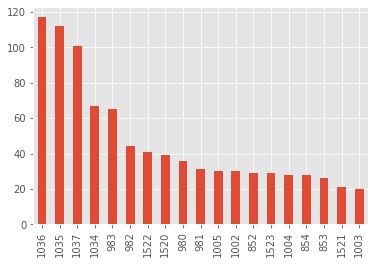

In [ ]:
#Gráfico de barras.
print(df["LojaID"].value_counts(ascending=False).plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


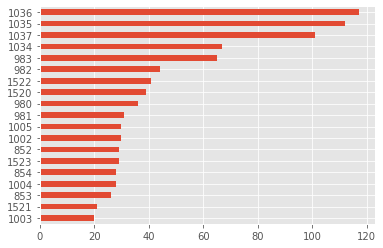

In [ ]:
#Gráfico de barras horizontais do maior para o menor.
print(df["LojaID"].value_counts(ascending=True).plot.barh())

AxesSubplot(0.260833,0.125;0.503333x0.755)


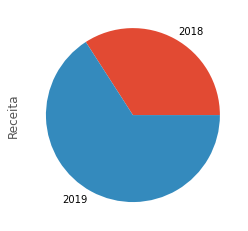

In [ ]:
#Gráfico de pizza.
print(df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie())

In [ ]:
  #Total de vendas por cidade.
print(df["Cidade"].value_counts())

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64


Text(0.5, 0, 'Total Vendas')

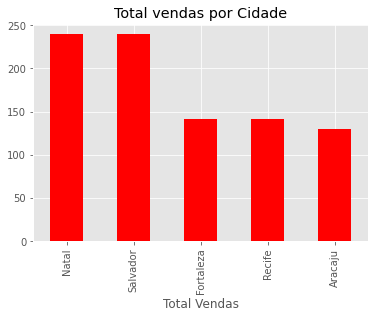

In [ ]:
#Adcionando um título e alterando o nome dos eixos e a cor das strings.
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title= "Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.xlabel("Total Vendas")

In [ ]:
#Alterando o estilo.
plt.style.use("ggplot") #Link para mais estilos em (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)


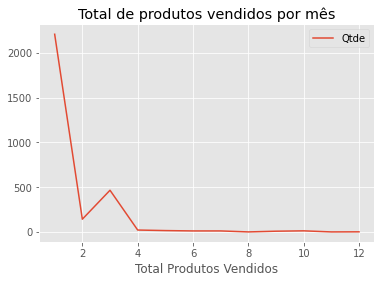

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.xlabel("Total Produtos Vendidos")
plt.legend()

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019.
df_2019 = df[df["Ano_Venda"] == 2019]


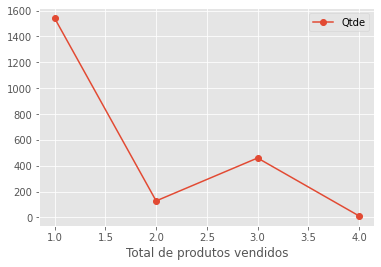

In [ ]:
#Total de produtos vendidos por mês.
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.xlabel("Total de produtos vendidos")
plt.legend()

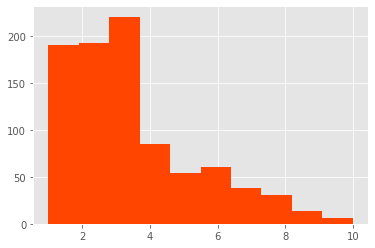

In [ ]:
#Hisograma.
plt.hist(df["Qtde"], color="orangered");



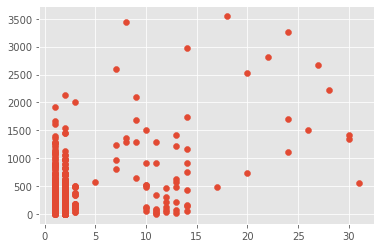

In [ ]:
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"])

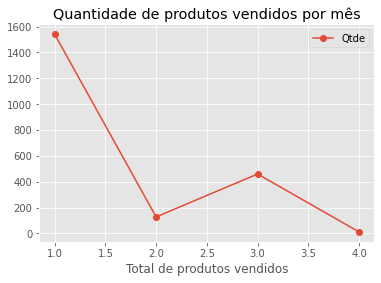

In [ ]:
#Salvando em png.
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.xlabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")